# Step Detection

By analysing the data that the acceleratior recorded, the goal here was to detect the steps taken on our paths. In the following, we explain our approach exemplary on the data of Building 64. The data of Karlebach Park was handled identically.

In [1]:
import numpy as np
import utils
from scipy import signal 
import matplotlib.pyplot as plt

folder = "preprocessed_data/"

## Building 64

First, we load the data from the accelerator and we set the recording frequency $f_s$ (Hz).

In [5]:
# load data
acc =  np.load(folder + "gebaeude64_acc.npy")
fs = 100

By using Scipy's *find_peaks* function which finds all local maxima by comparison of neighboring values, we can extract peaks / steps in the signal. For this, we have to set a threshold (*height*) from when the signal is considered a local maxima. This threshold was empirically determined by examining the signal's plot. 

Below is an example of the step detection of the first 30 seconds of the recording. In total, 336 steps were detected.

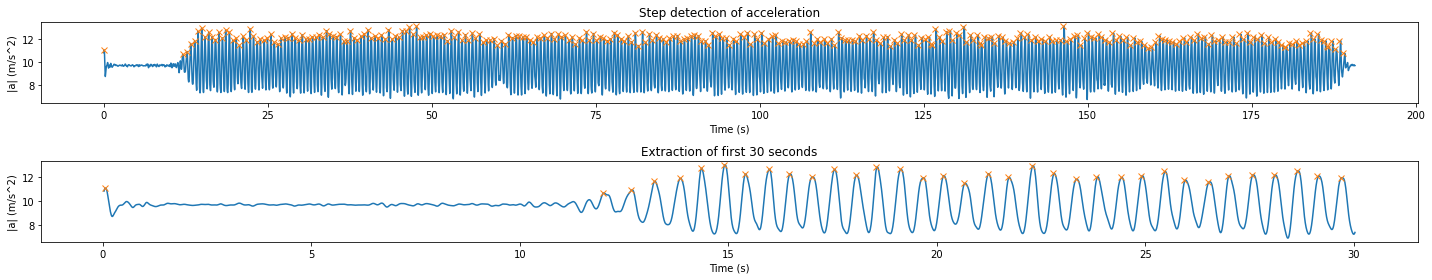

Number of peaks (steps):  336


In [19]:
#get first 30 secs
x = fs*30
height = 10.5

# find peaks
peaks, _ = signal.find_peaks(acc[1], height=height)
# extraction of signal for better plot
peaks_extraction, _ = signal.find_peaks(acc[1][0:x], height=height)

# plot signal & peaks
fig = plt.figure()
plt.subplot(2,1,1)
plt.title("Step detection of acceleration")
plt.plot(acc[0], acc[1])
plt.plot(peaks/fs, acc[1][peaks], "x")
plt.xlabel("Time (s)")
plt.ylabel("|a| (m/s^2)")
fig.set_figwidth(20)

plt.subplot(2,1,2)
plt.title("Extraction of first 30 seconds")
plt.plot(acc[0][0:x], acc[1][0:x])
plt.plot(peaks_extraction/fs, acc[1][0:x][peaks_extraction], "x")
plt.xlabel("Time (s)")
plt.ylabel("|a| (m/s^2)")
fig.set_figwidth(20)

plt.tight_layout()
plt.show()

print('Number of peaks (steps): ', len(peaks))

## Karlebach Park

The step detection of the recording in Karlebach Park is done analogously to Building 64. Due to a different recording device, a different recording frequency was used.

In total, 632 steps were detected.

In [3]:
# load data
acc = np.load(folder + "karlebach_acc.npy")
fs = 412

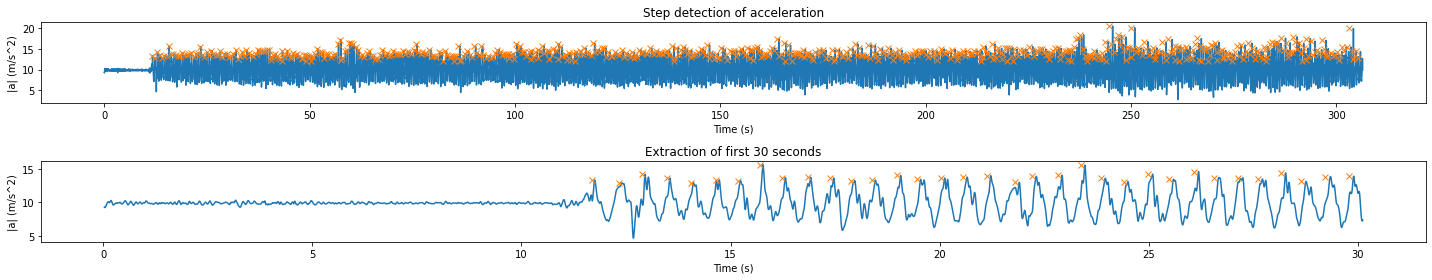

Number of peaks (steps):  632


In [5]:
#get first 30 secs
x = fs*30
height = 12
distance = 50

# find peaks
peaks, _ = signal.find_peaks(acc[1], height=height, distance=distance)
# extraction of signal for better plot
peaks_extraction, _ = signal.find_peaks(acc[1][0:x], height=height, distance=distance)

# plot signal & peaks
fig = plt.figure()
plt.subplot(2,1,1)
plt.title("Step detection of acceleration")
plt.plot(acc[0], acc[1])
plt.plot(peaks/fs, acc[1][peaks], "x")
plt.xlabel("Time (s)")
plt.ylabel("|a| (m/s^2)")
fig.set_figwidth(20)

plt.subplot(2,1,2)
plt.title("Extraction of first 30 seconds")
plt.plot(acc[0][0:x], acc[1][0:x])
plt.plot(peaks_extraction/fs, acc[1][0:x][peaks_extraction], "x")
plt.xlabel("Time (s)")
plt.ylabel("|a| (m/s^2)")
fig.set_figwidth(20)

plt.tight_layout()
plt.show()

print('Number of peaks (steps): ', len(peaks))